In [1]:
clear all

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
from scipy.signal import butter, lfilter
from scipy.fft import fft
import random
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [14]:
faultI10=scipy.io.loadmat('~/Desktop/Rotating Machine - Data/ZData_Fault_Rotating_Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_1_10hz.mat')
faultI30=scipy.io.loadmat('~/Desktop/Rotating Machine - Data/ZData_Fault_Rotating_Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_1_30hz.mat')
faultII10=scipy.io.loadmat('~/Desktop/Rotating Machine - Data/ZData_Fault_Rotating_Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_2_10hz.mat')
faultII30=scipy.io.loadmat('~/Desktop/Rotating Machine - Data/ZData_Fault_Rotating_Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_2_30hz.mat')
faultIII10=scipy.io.loadmat('~/Desktop/Rotating Machine - Data/ZData_Fault_Rotating_Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_3_10hz.mat')
faultIII30=scipy.io.loadmat('~/Desktop/Rotating Machine - Data/ZData_Fault_Rotating_Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_3_30hz.mat')
faultIV10=scipy.io.loadmat('~/Desktop/Rotating Machine - Data/ZData_Fault_Rotating_Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_4_10hz.mat')
faultIV30=scipy.io.loadmat('~/Desktop/Rotating Machine - Data/ZData_Fault_Rotating_Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_4_30hz.mat')
faultV10=scipy.io.loadmat('~/Desktop/Rotating Machine - Data/ZData_Fault_Rotating_Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_5_10hz.mat')
faultV30=scipy.io.loadmat('~/Desktop/Rotating Machine - Data/ZData_Fault_Rotating_Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_5_30hz.mat')
# faultVI10=scipy.io.loadmat('~/Desktop/Rotating Machine - Data/ZData_Fault_Rotating_Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_6_10hz.mat')
# faultVI30=scipy.io.loadmat('~/Desktop/Rotating Machine - Data/ZData_Fault_Rotating_Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_6_30hz.mat')

In [15]:
faultIII30

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Apr 08 16:29:14 2018',
 '__version__': '1.0',
 '__globals__': [],
 'Acquisition_un_3_30hz': array([[ 3.99996680e+00, -4.61425781e-01, -4.10156250e-01, ...,
         -4.51660156e-01,  1.95312500e-02, -2.92968750e-02],
        [ 4.00006640e+00, -4.41894531e-01, -4.10156250e-01, ...,
         -4.71191406e-01,  4.88281250e-03, -1.22070313e-02],
        [ 4.00016600e+00, -4.37011719e-01, -4.02832031e-01, ...,
         -4.51660156e-01, -3.66210938e-02,  0.00000000e+00],
        ...,
        [ 6.39997676e+01, -4.41894531e-01, -4.02832031e-01, ...,
         -4.00390625e-01, -7.81250000e-02, -5.12695313e-02],
        [ 6.39998672e+01, -4.68750000e-01, -4.24804688e-01, ...,
         -4.19921875e-01,  2.44140625e-02, -4.15039063e-02],
        [ 6.39999668e+01, -4.39453125e-01, -4.19921875e-01, ...,
         -4.76074219e-01, -6.59179688e-02, -2.92968750e-02]])}

In [16]:
sigII30=faultII30['Acquisition_un_2_30hz']
sigII10=faultII10['Acquisition_un_2_10hz']
del faultII30,faultII10
sigI30=faultI30['Acquisition_un_1_30hz']
sigI10=faultI10['Acquisition_un_1_10hz']
del faultI30,faultI10
sigIII10=faultIII10['Acquisition_un_3_10hz']
sigIII30=faultIII30['Acquisition_un_3_30hz']
del faultIII10,faultIII30
sigIV10=faultIV10['Acquisition_un_4_10hz']
sigIV30=faultIV30['Acquisition_un_4_30hz']
del faultIV10,faultIV30
sigV10=faultV10['Acquisition_un_5_10hz']
sigV30=faultV30['Acquisition_un_5_30hz']
del faultV10,faultV30
# sigVI10=faultVI10['Acquisition_un_6_10hz']
# sigVI30=faultVI30['Acquisition_un_6_30hz']
# del faultVI10,faultVI30

In [17]:
np.shape(sigI10)

(602406, 13)

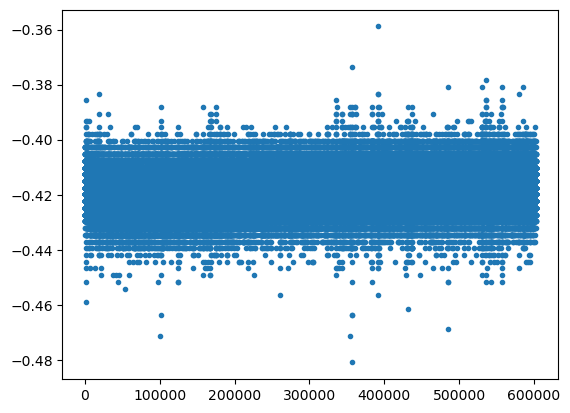

In [18]:
plt.plot(sigI10.T[5],'.')

In [19]:

def sliding_window(data, window_size, stride, training_size):
    """
    Applies a sliding window to the given data with the specified window size
    and stride length. Padding is added at the beginning and end of the data to
    ensure all samples are included in windows.
    """
    num_padding = window_size - stride
    data_padded = np.pad(data, ((num_padding, num_padding), (0, 0)), 'constant')
    window_data = []
    for i in range(0, len(data_padded) - window_size + 1, stride):
        window = data_padded[i:i+window_size, :]
        window_data.append(window)
    window_data = np.array(window_data)
    window_data = window_data[:training_size, :, :]
    window_data = np.transpose(window_data, (0, 2, 1))
    return window_data

In [20]:
windowsize=3000
stride=1500

In [21]:
sigtI10hz=sliding_window(sigI10,windowsize,stride,40000)
sigtI30hz=sliding_window(sigI30,windowsize,stride,40000)
sigtII10hz=sliding_window(sigII10,windowsize,stride,40000)
sigtII30hz=sliding_window(sigII30,windowsize,stride,40000)
del sigI10,sigI30,sigII10,sigII30
sigtIII30hz=sliding_window(sigIII30,windowsize,stride,40000)
sigtIII10hz=sliding_window(sigIII10,windowsize,stride,40000)
sigtIV30hz=sliding_window(sigIV30,windowsize,stride,40000)
sigtIV10hz=sliding_window(sigIV10,windowsize,stride,40000)
del sigIII30,sigIII10,sigIV30,sigIV10
sigtV30hz=sliding_window(sigV30,windowsize,stride,40000)
sigtV10hz=sliding_window(sigV10,windowsize,stride,40000)
# sigtVI30hz=sliding_window(sigVI30,windowsize,stride,40000)
# sigtVI10hz=sliding_window(sigVI10,windowsize,stride,40000)
# del sigV30,sigV10,sigVI30,sigVI10

In [8]:
shapeaa=(402, 13, 3000)

Text(0.5, 0.98, 'Group E')

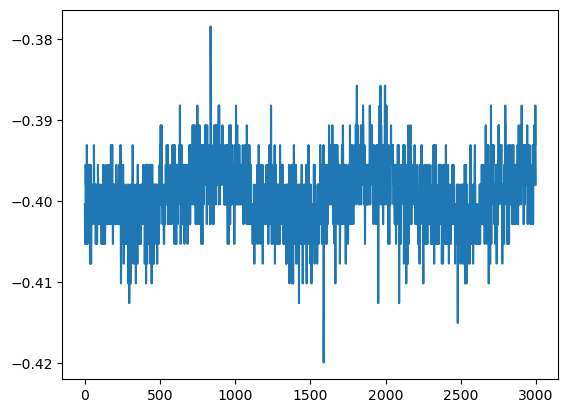

<Figure size 100x500 with 0 Axes>

In [23]:
plt.plot(sigtII10hz[80][2][:])
plt5=plt.figure(figsize=(1,5))
plt5.suptitle('Group E')

# plt.plot(sigtII10hz[80][2][:])

In [24]:
from scipy import signal
from scipy.signal import butter, filtfilt

In [26]:
freq=[[0.1,800],[800,1600],[1600,3200],[3200,4999]]
cntfilterI10=np.zeros((np.shape(sigtIII30hz)[0], np.shape(sigtIII30hz)[1], 5, np.shape(sigtIII30hz)[2]))
cntfilterI30=np.zeros((np.shape(sigtIII30hz)[0], np.shape(sigtIII30hz)[1], 5, np.shape(sigtIII30hz)[2]))
cntfilterII10=np.zeros((np.shape(sigtIII30hz)[0], np.shape(sigtIII30hz)[1], 5, np.shape(sigtIII30hz)[2]))
cntfilterII30=np.zeros((np.shape(sigtIII30hz)[0], np.shape(sigtIII30hz)[1], 5, np.shape(sigtIII30hz)[2]))
cntfilterIII10=np.zeros((np.shape(sigtIII30hz)[0], np.shape(sigtIII30hz)[1], 5, np.shape(sigtIII30hz)[2]))
cntfilterIII30=np.zeros((np.shape(sigtIII30hz)[0], np.shape(sigtIII30hz)[1], 5, np.shape(sigtIII30hz)[2]))
cntfilterIV30=np.zeros((np.shape(sigtIII30hz)[0], np.shape(sigtIII30hz)[1], 5, np.shape(sigtIII30hz)[2]))
cntfilterIV10=np.zeros((np.shape(sigtIII30hz)[0], np.shape(sigtIII30hz)[1], 5, np.shape(sigtIII30hz)[2]))
cntfilterV30=np.zeros((np.shape(sigtIII30hz)[0], np.shape(sigtIII30hz)[1], 5, np.shape(sigtIII30hz)[2]))
cntfilterV10=np.zeros((np.shape(sigtIII30hz)[0], np.shape(sigtIII30hz)[1], 5, np.shape(sigtIII30hz)[2]))
# cntfilterVI30=np.zeros((np.shape(sigtIII30hz)[0], np.shape(sigtIII30hz)[1], 5, np.shape(sigtIII30hz)[2]))
# cntfilterVI10=np.zeros((np.shape(sigtIII30hz)[0], np.shape(sigtIII30hz)[1], 5, np.shape(sigtIII30hz)[2]))

for i in range(len(freq)):
    fh=freq[i][0]
    fl=freq[i][1]
    fs = 10000
    type='bandpass'
    wn = [fh*2/fs, fl*2/fs]
    [b,a]=signal.butter(3,wn,type)
    
    # filter the last dimension of each signal
    sigfI10hz=np.apply_along_axis(lambda x: signal.filtfilt(b, a, x), axis=-1, arr=sigtI10hz)
    sigfI30hz=np.apply_along_axis(lambda x: signal.filtfilt(b, a, x), axis=-1, arr=sigtI30hz)
    sigfII10hz=np.apply_along_axis(lambda x: signal.filtfilt(b, a, x), axis=-1, arr=sigtII10hz)
    sigfII30hz=np.apply_along_axis(lambda x: signal.filtfilt(b, a, x), axis=-1, arr=sigtII30hz)
    sigfIII10hz=np.apply_along_axis(lambda x: signal.filtfilt(b, a, x), axis=-1, arr=sigtIII10hz)
    sigfIII30hz=np.apply_along_axis(lambda x: signal.filtfilt(b, a, x), axis=-1, arr=sigtIII30hz)
    sigfIV10hz=np.apply_along_axis(lambda x: signal.filtfilt(b, a, x), axis=-1, arr=sigtIV10hz)
    sigfIV30hz=np.apply_along_axis(lambda x: signal.filtfilt(b, a, x), axis=-1, arr=sigtIV30hz)
    sigfV10hz=np.apply_along_axis(lambda x: signal.filtfilt(b, a, x), axis=-1, arr=sigtV10hz)
    sigfV30hz=np.apply_along_axis(lambda x: signal.filtfilt(b, a, x), axis=-1, arr=sigtV30hz)
    # sigfVI10hz=np.apply_along_axis(lambda x: signal.filtfilt(b, a, x), axis=-1, arr=sigtVI10hz)
    # sigfVI30hz=np.apply_along_axis(lambda x: signal.filtfilt(b, a, x), axis=-1, arr=sigtVI30hz)
    
    cntfilterI10[:,:,i,:] = sigfI10hz
    cntfilterI30[:,:,i,:] = sigfI30hz
    del sigfI10hz,sigfI30hz
    cntfilterII10[:,:,i,:] = sigfII10hz
    cntfilterII30[:,:,i,:] = sigfII30hz
    del sigfII10hz,sigfII30hz
    cntfilterIII10[:,:,i,:] = sigfIII10hz
    cntfilterIII30[:,:,i,:] = sigfIII30hz
    del sigfIII10hz,sigfIII30hz
    cntfilterIV10[:,:,i,:] = sigfIV10hz
    cntfilterIV30[:,:,i,:] = sigfIV30hz
    del sigfIV10hz,sigfIV30hz
    cntfilterV10[:,:,i,:] = sigfV10hz
    cntfilterV30[:,:,i,:] = sigfV30hz
    del sigfV10hz,sigfV30hz
    # cntfilterVI10[:,:,i,:] = sigfVI10hz
    # cntfilterVI30[:,:,i,:] = sigfVI30hz
    # del sigfVI10hz,sigfVI30hz

In [27]:
np.shape(cntfilterII30)

(402, 13, 5, 3000)

C:\Users\PikPik\anaconda\anaconda latest\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


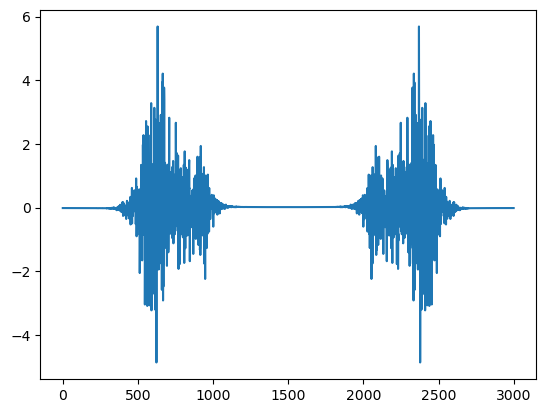

In [28]:
plt.plot(fft(cntfilterII30[2][10][2]))

In [29]:
def normalize_last_dim(data, epsilon=0.01):
    # compute mean and standard deviation along the last dimension of the data
    last_dim_mean = np.mean(data, axis=-1, keepdims=True)
    last_dim_std = np.std(data, axis=-1, keepdims=True)

    # normalize the last dimension using the mean and standard deviation
    normalized_data = (data- last_dim_mean) /last_dim_std+epsilon

#     # stack the normalized values with the original values along the last dimension
    # normalized_data = np.concatenate([data[..., :-1], normalized_data[..., np.newaxis]], axis=-1)

    return normalized_data

In [30]:
import numpy as np
from scipy.stats import kurtosis, skew

def time_domain_features(data):
    data=normalize_last_dim(data)
    # Mean
    mean = np.mean(data, axis=-1)
    # Standard deviation
    std = np.std(data, axis=-1)
    # Root-mean-square
    rms = np.sqrt(np.mean(np.square(data), axis=-1))
    # Peak-to-peak value
    ptp = np.ptp(data, axis=-1)
    # Crest factor
    crest_factor = np.max(data, axis=-1) / rms
    # Shape factor
    shape_factor = rms / mean
    # Kurtosis
    kurt = kurtosis(data, axis=-1)
    # Skewness
    skewness = skew(data, axis=-1)
    # Variance
    var = np.var(data, axis=-1)
    
    # Concatenate all the features along the last axis
    features = np.stack((mean, std, rms, ptp, crest_factor, shape_factor, kurt, skewness, var), axis=-1)
    
    return features
# Frequency-domain features

import numpy as np

def extract_features(data):
    """
    Extract features for vibration signal in frequency domain using FFT.
    
    Args:
        data (numpy.ndarray): 4D array with shape (603,13,5,2000).
    
    Returns:
        numpy.ndarray: 4D array with shape (603,13,5,number of features), where
        number of features is half the number of samples in the last axis after FFT.
    """
    # Apply FFT to the last axis of the data array.
    fft_data = np.fft.fft(data, axis=-1)
    fftndata=normalize_last_dim(fft_data)
    # Calculate the magnitude spectrum of the FFT data.
    mag_spectrum = np.abs(fftndata)
    
    # Keep only the first half of the spectrum (since the second half is a mirror image).
    num_samples = mag_spectrum.shape[-1]
    half_num_samples = num_samples // 2
    mag_spectrum = mag_spectrum[..., :half_num_samples]
    
    # Square the magnitude spectrum to get the power spectrum.
    power_spectrum = mag_spectrum ** 2
    
    # Calculate the mean, variance, skewness, and kurtosis of the power spectrum.
    mean_spectrum = np.mean(power_spectrum, axis=-1)
    var_spectrum = np.var(power_spectrum, axis=-1)
    skew_spectrum = np.apply_along_axis(scipy.stats.skew, axis=-1, arr=power_spectrum)
    kurt_spectrum = np.apply_along_axis(scipy.stats.kurtosis, axis=-1, arr=power_spectrum)
    
    # Concatenate the feature arrays along the last axis.
    features = np.stack([mean_spectrum, var_spectrum, skew_spectrum, kurt_spectrum], axis=-1)
    
    return features

In [31]:
ff1=time_domain_features(cntfilterI10)
ff1_1=extract_features(cntfilterI10)

del cntfilterI10
ff2=time_domain_features(cntfilterI30)
ff2_1=extract_features(cntfilterI30)
del cntfilterI30

ff3=time_domain_features(cntfilterII10)
ff3_1=extract_features(cntfilterII10)
del cntfilterII10

ff4=time_domain_features(cntfilterII30)
ff4_1=extract_features(cntfilterII30)
del cntfilterII30

ff5=time_domain_features(cntfilterIII10)
ff5_1=extract_features(cntfilterIII10)
del cntfilterIII10

ff6=time_domain_features(cntfilterIII30)
ff6_1=extract_features(cntfilterIII30)
del cntfilterIII30

ff7=time_domain_features(cntfilterIV10)
ff7_1=extract_features(cntfilterIV10)
del cntfilterIV10

ff8=time_domain_features(cntfilterIV30)
ff8_1=extract_features(cntfilterIV30)
del cntfilterIV30

ff9=time_domain_features(cntfilterV10)
ff9_1=extract_features(cntfilterV10)
del cntfilterV10

ff10=time_domain_features(cntfilterV30)
ff10_1=extract_features(cntfilterV30)
del cntfilterV30

# ff11=time_domain_features(a11n)
# del a11n
# ff12=time_domain_features(a12n)
# del a12n

# ff11_1=extract_features(a11_1n)
# del a11_1n
# ff12_1=extract_features(a12_1n)
# del a12_1n

C:\Users\PikPik\AppData\Local\Temp\ipykernel_13060\2476863199.py:7: RuntimeWarning: invalid value encountered in true_divide
  normalized_data = (data- last_dim_mean) /last_dim_std+epsilon


In [32]:
np.shape(ff1)

(402, 13, 5, 9)

In [34]:
np.save('ff1.npy', np.array(ff1))
np.save('ff1_1.npy', np.array(ff1_1))
np.save('ff2.npy', np.array(ff2))
np.save('ff2_1.npy', np.array(ff2_1))
np.save('ff3.npy', np.array(ff3))
np.save('ff3_1.npy',  np.array(ff3_1))
np.save('ff4.npy', np.array(ff4))
np.save('ff5_1.npy', np.array(ff5_1))
np.save('ff4_1.npy', np.array(ff4_1))
np.save('ff5.npy', np.array(ff5))
np.save('ff6.npy', np.array(ff6))
np.save('ff6_1.npy',  np.array(ff6_1))
np.save('ff7.npy', np.array(ff7))
np.save('ff7_1.npy',  np.array(ff7_1))
np.save('ff8.npy', np.array(ff8))
np.save('ff8_1.npy',  np.array(ff8_1))
np.save('ff9.npy', np.array(ff9))
np.save('ff9_1.npy',  np.array(ff9_1))
np.save('ff10.npy', np.array(ff10))
np.save('ff10_1.npy',  np.array(ff10_1))

In [2]:
ff1=np.load('C:/Users/PikPik/Desktop/rotary/ff1.npy')
ff1_1=np.load('C:/Users/PikPik/Desktop/rotary/ff1_1.npy')
ff2=np.load('C:/Users/PikPik/Desktop/rotary/ff2.npy')
ff2_1=np.load('C:/Users/PikPik/Desktop/rotary/ff2_1.npy')
ff3=np.load('C:/Users/PikPik/Desktop/rotary/ff3.npy')
ff3_1=np.load('C:/Users/PikPik/Desktop/rotary/ff3_1.npy')
ff4=np.load('C:/Users/PikPik/Desktop/rotary/ff4.npy')
ff4_1=np.load('C:/Users/PikPik/Desktop/rotary/ff4_1.npy')
ff5=np.load('C:/Users/PikPik/Desktop/rotary/ff5.npy')
ff5_1=np.load('C:/Users/PikPik/Desktop/rotary/ff5_1.npy')
ff6=np.load('C:/Users/PikPik/Desktop/rotary/ff6.npy')
ff6_1=np.load('C:/Users/PikPik/Desktop/rotary/ff6_1.npy')
ff7=np.load('C:/Users/PikPik/Desktop/rotary/ff7.npy')
ff7_1=np.load('C:/Users/PikPik/Desktop/rotary/ff7_1.npy')
ff8=np.load('C:/Users/PikPik/Desktop/rotary/ff8.npy')
ff8_1=np.load('C:/Users/PikPik/Desktop/rotary/ff8_1.npy')
ff9=np.load('C:/Users/PikPik/Desktop/rotary/ff9.npy')
ff9_1=np.load('C:/Users/PikPik/Desktop/rotary/ff9_1.npy')
ff10=np.load('C:/Users/PikPik/Desktop/rotary/ff10.npy')
ff10_1=np.load('C:/Users/PikPik/Desktop/rotary/ff10_1.npy')

In [3]:
data_combinedI10 = np.delete(np.concatenate([ff1, ff1_1], axis=-1),0,axis=1)
data_combinedI30 = np.delete(np.concatenate([ff2, ff2_1], axis=-1),0,axis=1)
data_combinedII10 =np.delete(np.concatenate([ff3, ff3_1], axis=-1),0,axis=1)
data_combinedII30 = np.delete(np.concatenate([ff4, ff4_1], axis=-1),0,axis=1)
data_combinedIII10 = np.delete(np.concatenate([ff5, ff5_1], axis=-1),0,axis=1)
data_combinedIII30 = np.delete(np.concatenate([ff6, ff6_1], axis=-1),0,axis=1)
data_combinedIV10 = np.delete(np.concatenate([ff7, ff7_1], axis=-1),0,axis=1)
data_combinedIV30 = np.delete(np.concatenate([ff8, ff8_1], axis=-1),0,axis=1)
data_combinedV10 = np.delete(np.concatenate([ff9, ff9_1], axis=-1),0,axis=1)
data_combinedV30 = np.delete(np.concatenate([ff10, ff10_1], axis=-1),0,axis=1)
# data_combinedVI10 = np.delete(np.concatenate([ff11, ff11_1], axis=-1),0,axis=1)
# data_combinedVI30 = np.delete(np.concatenate([ff12, ff12_1], axis=-1),0,axis=1)
# data_combinedI=data_combinedI1.reshape(sigtI10hz.shape[0], 2, sigtI10hz.shape[1], sigtI10hz.shape[2])

In [4]:
np.shape(data_combinedV30)

(402, 12, 5, 13)

In [5]:
datalable1=np.concatenate([data_combinedI10,data_combinedI30],axis=-1)
del data_combinedI10,data_combinedI30
datalable2=np.concatenate([data_combinedII10,data_combinedII30],axis=-1)
del data_combinedII10,data_combinedII30
datalable3=np.concatenate([data_combinedIII10,data_combinedIII30],axis=-1)
del data_combinedIII10,data_combinedIII30
datalable4=np.concatenate([data_combinedIV10,data_combinedIV30],axis=-1)
del data_combinedIV10,data_combinedIV30
datalabele5=np.concatenate([data_combinedV10,data_combinedV30],axis=-1)
del data_combinedV10,data_combinedV30
# datalabele6=np.concatenate([data_combinedVI10,data_combinedVI30],axis=-1)
# del data_combinedVI10,data_combinedVI30

In [6]:
dataI=np.reshape(datalable1,(402,12*5*26))
del datalable1
dataII=np.reshape(datalable2,(402,12*5*26))
del datalable2
dataIII=np.reshape(datalable3,(402,12*5*26))
del datalable3
dataIV=np.reshape(datalable4,(402,12*5*26))
del datalable4
dataV=np.reshape(datalabele5,(402,12*5*26))
del datalabele5
# dataVI=np.reshape(datalable6,(np.shape(sigtIII30hz)[0],12*5*26))
# del datalable6

In [7]:
labels=np.concatenate((np.ones(np.shape(ff1)[0]),np.zeros(np.shape(ff1)[0]),np.ones(np.shape(ff1)[0])*4,np.ones(np.shape(ff1)[0])*2,np.ones(np.shape(ff1)[0])*3),axis=0)
dataall=np.concatenate([dataI,dataII,dataIII,dataIV,dataV],axis=0)

# del dataI,dataII,dataIII,dataIV,dataV,dataVI
import numpy as np

# Shuffle the indices
indices = np.random.permutation(dataall.shape[0])

# Use the shuffled indices to shuffle both data and labels
shuffled_data = dataall[indices]

shuffled_labels = labels[indices]

In [8]:
np.shape(shuffled_data)

(2010, 1560)

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load data into numpy array
data = shuffled_data

# Check for NaN and infinite values in data
if np.isnan(data).any():
    data = np.nan_to_num(data)
if np.isinf(data).any():
    data[np.isinf(data)] = np.finfo(np.float64).max

# Scale data using MinMaxScaler()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [10]:
np.shape(scaled_data)

(2010, 1560)

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

def split_data_equally(X, y, test_size=0.4, random_state=None):
    # Get unique labels in y and their indices
    labels, indices = np.unique(y, return_index=True)
    n_labels = len(labels)
    
    # Split each label's indices into test and train
    train_indices = []
    test_indices = []
    for i in range(n_labels):
        label_indices = np.where(y == labels[i])[0]
        label_train_indices, label_test_indices = train_test_split(label_indices, test_size=test_size, 
                                                                    random_state=random_state)
        train_indices += list(label_train_indices)
        test_indices += list(label_test_indices)
    
    # Shuffle train and test indices
    np.random.shuffle(train_indices)
    np.random.shuffle(test_indices)
    
    # Get corresponding data and labels
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test

In [12]:
X_train1, X1_test, y_train, y1_test = split_data_equally(scaled_data,shuffled_labels,test_size=0.4 )


In [13]:
Xvalue1,X_test1,yvalue,y_test=split_data_equally(X1_test, y1_test,test_size=0.5)


In [14]:
np.shape(X1_test)

(805, 1560)

In [15]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
# selector = SelectKBest(f_classif, k=10) # choose the top 5 features
# X_selected = selector.fit_transform(X_train, y_train)
# xvalue1=selector.transform(Xvalue)
# xtest_selected=selector.transform(X_test)

def ff(k):
    selector = SelectKBest(f_classif, k=k)
    X_train = selector.fit_transform(X_train1, y_train)
    X_test = selector.transform(X_test1)
    Xvalue = selector.transform(Xvalue1)

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    Xvalue = scaler.transform(Xvalue)

    # Perform ANOVA feature selection
    selector = SelectKBest(f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    Xvalue_selected = selector.transform(Xvalue)

    # Train and evaluate classifiers
    svm = SVC(probability=True)
    svm.fit(X_train_selected, y_train)
    svm_scores = [svm.score(X_train_selected, y_train), svm.score(Xvalue_selected, yvalue)]

    knn = KNeighborsClassifier()
    knn.fit(X_train_selected, y_train)
    knn_scores = [knn.score(X_train_selected, y_train), knn.score(Xvalue_selected, yvalue)]

    rf = RandomForestClassifier(n_estimators=100, criterion='gini')
    rf.fit(X_train_selected, y_train)
    rf_scores = [rf.score(X_train_selected, y_train), rf.score(Xvalue_selected, yvalue)]

    dt = tree.DecisionTreeClassifier(criterion='gini')
    dt.fit(X_train_selected, y_train)
    dt_scores = [dt.score(X_train_selected, y_train), dt.score(Xvalue_selected, yvalue)]

    return svm_scores, knn_scores,rf_scores, dt_scores

    

In [16]:

all=[]
for i in range(120):
    all+=[ff(i+1)]
    

C:\Users\PikPik\anaconda\anaconda latest\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 104  105  106  107  108  109  110  111  112  113  114  115  116  117
  118  119  120  121  122  123  124  125  126  127  128  129  234  235
  236  237  238  239  240  241  242  243  244  245  246  247  248  249
  250  251  252  253  254  255  256  257  258  259  364  365  366  367
  368  369  370  371  372  373  374  375  376  377  378  379  380  381
  382  383  384  385  386  387  388  389  494  495  496  497  498  499
  500  501  502  503  504  505  506  507  508  509  510  511  512  513
  514  515  516  517  518  519  624  625  626  627  628  629  630  631
  632  633  634  635  636  637  638  639  640  641  642  643  644  645
  646  647  648  649  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  884  885  886  887  888  889  890  891  892  893  894  895
  896  897 

In [169]:
np.shape(all)

(120, 4, 2)

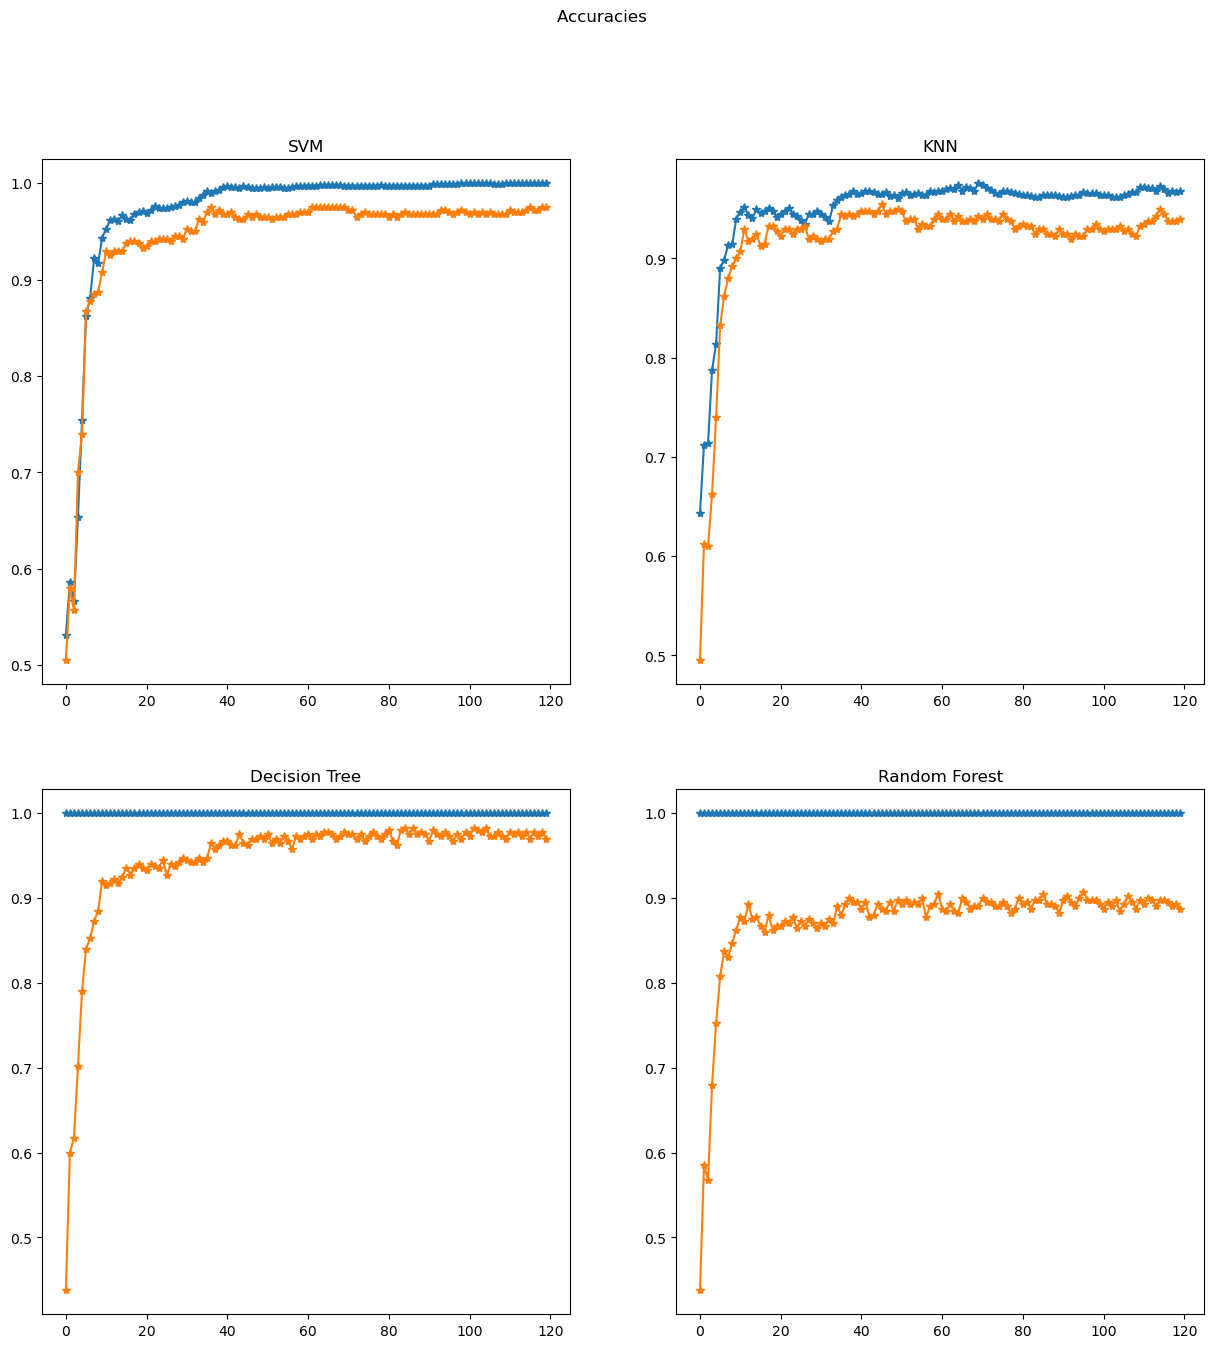

In [17]:
all = np.array(all)
fig, axs = plt.subplots(2,2, figsize=(15, 15))
axs[0][0].plot(all[:, 0, :],'-*')
axs[0][0].set_title('SVM')
axs[0][1].plot(all[:, 1, :],'-*')
axs[0][1].set_title('KNN')
axs[1][0].plot(all[:, 2, :],'-*')
axs[1][0].set_title('Decision Tree')
axs[1][1].plot(all[:, 3, :],'-*')
axs[1][1].set_title('Random Forest')
fig.suptitle('Accuracies ')
# plt.savefig('fig.jpg')
# show the figure
plt.show()
# plt.savefig('fig.jpg')

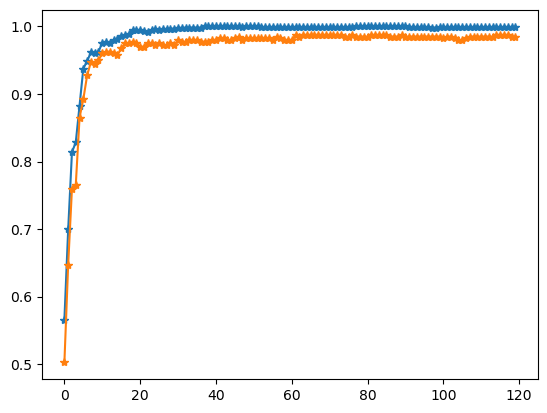

In [37]:
all = np.array(all)  # convert list to NumPy array
plt.plot(all[:, 0, :],'-*')  # plot second column of all samples
plt.savefig('SVM.jpg')

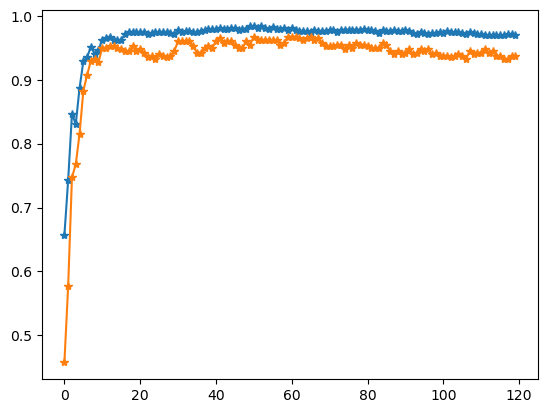

In [38]:
all = np.array(all)  # convert list to NumPy array
plt.plot(all[:, 1, :],'-*')  # plot second column of all samples
plt.savefig('KKN.jpg')

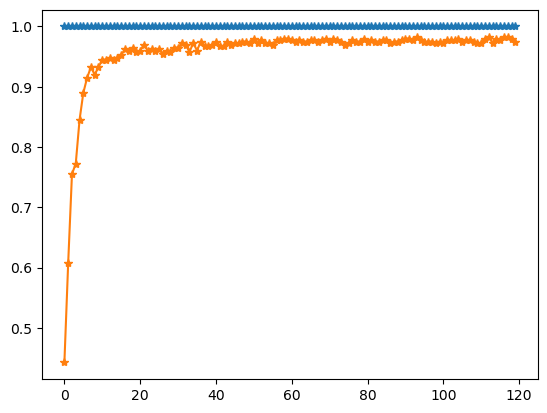

In [39]:
all = np.array(all)  # convert list to NumPy array
plt.plot(all[:, 2, :],'-*')  # plot second column of all samples
plt.savefig('RF.jpg')

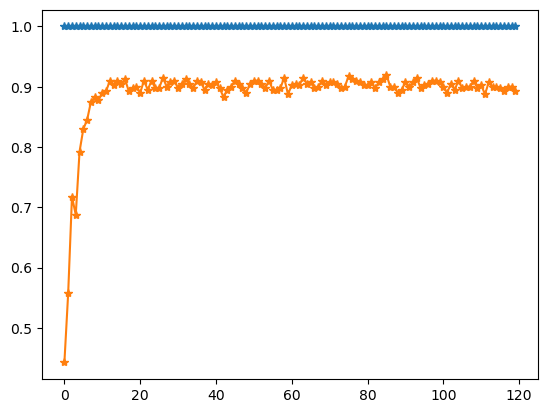

In [40]:
all = np.array(all)  # convert list to NumPy array
plt.plot(all[:, 3, :],'-*')  # plot second column of all samples
plt.savefig('DT.jpg')

In [41]:
svm

<module 'sklearn.svm' from 'C:\\Users\\PikPik\\anaconda\\anaconda latest\\lib\\site-packages\\sklearn\\svm\\__init__.py'>

In [18]:
selector = SelectKBest(f_classif, k=50) # choose the top 5 features
X_selectedsvm = selector.fit_transform(X_train1, y_train)
xvalue1svm=selector.transform(Xvalue1)
xtest_selectedsvm=selector.transform(X_test1)
classifier1 = SVC(probability=True)
classifier1.fit(X_selectedsvm,y_train)
sss1=classifier1.predict(xtest_selectedsvm)
# predictsvm=classifier1.predict(featuresffs_svmtest)
# sss3=classifier1.predict(featuresffs_svmtesty)
# a1=confusion_matrix(predictsvm,ylabeltest)
a5=classifier1.score(X_selectedsvm, y_train)
a3=classifier1.score(xvalue1svm, yvalue)
a1=classifier1.score(xtest_selectedsvm, y_test)
a2=confusion_matrix(sss1,y_test)

C:\Users\PikPik\anaconda\anaconda latest\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 104  105  106  107  108  109  110  111  112  113  114  115  116  117
  118  119  120  121  122  123  124  125  126  127  128  129  234  235
  236  237  238  239  240  241  242  243  244  245  246  247  248  249
  250  251  252  253  254  255  256  257  258  259  364  365  366  367
  368  369  370  371  372  373  374  375  376  377  378  379  380  381
  382  383  384  385  386  387  388  389  494  495  496  497  498  499
  500  501  502  503  504  505  506  507  508  509  510  511  512  513
  514  515  516  517  518  519  624  625  626  627  628  629  630  631
  632  633  634  635  636  637  638  639  640  641  642  643  644  645
  646  647  648  649  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  884  885  886  887  888  889  890  891  892  893  894  895
  896  897 

In [19]:
print(a5,a1,a3,a2)

0.9900414937759336 0.9679012345679012 0.965 [[75  1  0  0  3]
 [ 1 80  1  0  0]
 [ 0  0 80  0  0]
 [ 0  0  0 80  1]
 [ 5  0  0  1 77]]


In [20]:
conf_mat=a2
total_samples = np.sum(conf_mat)

# Calculate accuracy for each class
accuracy = np.diag(conf_mat) / np.sum(conf_mat, axis=1)

# Calculate specificity for each class
false_positive = np.sum(conf_mat, axis=0) - np.diag(conf_mat)
true_negative = total_samples - np.sum(conf_mat, axis=1) - false_positive
specificity = true_negative / (true_negative + false_positive)

# Calculate sensitivity for each class
sensitivity = np.diag(conf_mat) / np.sum(conf_mat, axis=0)

# Print the results
for i in range(5):
    print(f"Class {i}: accuracy = {accuracy[i]:.3f}, specificity = {specificity[i]:.3f}, sensitivity = {sensitivity[i]:.3f}")

Class 0: accuracy = 0.949, specificity = 0.982, sensitivity = 0.926
Class 1: accuracy = 0.976, specificity = 0.997, sensitivity = 0.988
Class 2: accuracy = 1.000, specificity = 0.997, sensitivity = 0.988
Class 3: accuracy = 0.988, specificity = 0.997, sensitivity = 0.988
Class 4: accuracy = 0.928, specificity = 0.988, sensitivity = 0.951


In [21]:
selector = SelectKBest(f_classif, k=60) # choose the top 5 features
X_selectedknn = selector.fit_transform(X_train1, y_train)
xvalue1knn=selector.transform(Xvalue1)
xtest_selectedknn=selector.transform(X_test1)
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=2,p=1, metric='minkowski', metric_params=None, n_jobs=None)

classifier.fit(X_selectedknn,y_train)
# sss12=classifier.predict(xtest_selected)
# predictsvm=classifier1.predict(featuresffs_svmtest)
# sss3=classifier1.predict(featuresffs_svmtesty)
# a1=confusion_matrix(predictsvm,ylabeltest)
a51=classifier.score(X_selectedknn, y_train)
a31=classifier.score(xvalue1knn, yvalue)
a11=classifier.score(xtest_selectedknn, y_test)
a21=confusion_matrix(sss1,y_test)

C:\Users\PikPik\anaconda\anaconda latest\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 104  105  106  107  108  109  110  111  112  113  114  115  116  117
  118  119  120  121  122  123  124  125  126  127  128  129  234  235
  236  237  238  239  240  241  242  243  244  245  246  247  248  249
  250  251  252  253  254  255  256  257  258  259  364  365  366  367
  368  369  370  371  372  373  374  375  376  377  378  379  380  381
  382  383  384  385  386  387  388  389  494  495  496  497  498  499
  500  501  502  503  504  505  506  507  508  509  510  511  512  513
  514  515  516  517  518  519  624  625  626  627  628  629  630  631
  632  633  634  635  636  637  638  639  640  641  642  643  644  645
  646  647  648  649  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  884  885  886  887  888  889  890  891  892  893  894  895
  896  897 

In [22]:
print(a51,a11,a31,a21)

0.9568464730290457 0.908641975308642 0.955 [[75  1  0  0  3]
 [ 1 80  1  0  0]
 [ 0  0 80  0  0]
 [ 0  0  0 80  1]
 [ 5  0  0  1 77]]


In [23]:
conf_mat=a21
total_samples = np.sum(conf_mat)

# Calculate accuracy for each class
accuracy = np.diag(conf_mat) / np.sum(conf_mat, axis=1)

# Calculate specificity for each class
false_positive = np.sum(conf_mat, axis=0) - np.diag(conf_mat)
true_negative = total_samples - np.sum(conf_mat, axis=1) - false_positive
specificity = true_negative / (true_negative + false_positive)

# Calculate sensitivity for each class
sensitivity = np.diag(conf_mat) / np.sum(conf_mat, axis=0)

# Print the results
for i in range(5):
    print(f"Class {i}: accuracy = {accuracy[i]:.3f}, specificity = {specificity[i]:.3f}, sensitivity = {sensitivity[i]:.3f}")

Class 0: accuracy = 0.949, specificity = 0.982, sensitivity = 0.926
Class 1: accuracy = 0.976, specificity = 0.997, sensitivity = 0.988
Class 2: accuracy = 1.000, specificity = 0.997, sensitivity = 0.988
Class 3: accuracy = 0.988, specificity = 0.997, sensitivity = 0.988
Class 4: accuracy = 0.928, specificity = 0.988, sensitivity = 0.951


In [24]:
dataset1 = TensorDataset(torch.tensor(X_train1).float(), torch.tensor(y_train).long())
train_loader1 = DataLoader(dataset1, batch_size=300, shuffle=True)


NameError: name 'TensorDataset' is not defined

In [57]:
# train_model(model2, criterion, optimizer1,train_loader1,20)

In [168]:
model2(torch.tensor(X_train1).float())

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1205x1560 and 20x64)

In [ ]:
np.shape(X_train1)

In [ ]:
torch.sum(1*(torch.argmax(model2(torch.tensor(X_train1).float())))==torch.tensor(y_train).long())/475

In [82]:
selector = SelectKBest(f_classif, k=300) # choose the top 5 features
X_selectedrf = selector.fit_transform(X_train1, y_train)
xvalue1rf=selector.transform(Xvalue1)
xtest_selectedrf=selector.transform(X_test1)
clffr=RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=5,
                             min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                             bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False,
                             class_weight=None, ccp_alpha=0.0, max_samples=None)
clffr.fit(X_selectedrf,y_train)
sss13=clffr.predict(xtest_selectedrf)
# predictsvm=classifier1.predict(featuresffs_svmtest)
# sss3=classifier1.predict(featuresffs_svmtesty)
# a1=confusion_matrix(predictsvm,ylabeltest)
a52=clffr.score(X_selectedrf, y_train)
a32=clffr.score(xvalue1rf, yvalue)
a12=clffr.score(xtest_selectedrf, y_test)
a22=confusion_matrix(sss1,y_test)

C:\Users\PikPik\anaconda\anaconda latest\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 104  105  106  107  108  109  110  111  112  113  114  115  116  117
  118  119  120  121  122  123  124  125  126  127  128  129  234  235
  236  237  238  239  240  241  242  243  244  245  246  247  248  249
  250  251  252  253  254  255  256  257  258  259  364  365  366  367
  368  369  370  371  372  373  374  375  376  377  378  379  380  381
  382  383  384  385  386  387  388  389  494  495  496  497  498  499
  500  501  502  503  504  505  506  507  508  509  510  511  512  513
  514  515  516  517  518  519  624  625  626  627  628  629  630  631
  632  633  634  635  636  637  638  639  640  641  642  643  644  645
  646  647  648  649  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  884  885  886  887  888  889  890  891  892  893  894  895
  896  897 

In [83]:
print(a52,a12,a32,a22)

0.9975103734439834 0.9777777777777777 0.9825 [[74  1  0  0  5]
 [ 0 80  0  0  0]
 [ 1  0 81  2  0]
 [ 0  0  0 79  1]
 [ 6  0  0  0 75]]


In [84]:
conf_mat=a22
total_samples = np.sum(conf_mat)

# Calculate accuracy for each class
accuracy = np.diag(conf_mat) / np.sum(conf_mat, axis=1)

# Calculate specificity for each class
false_positive = np.sum(conf_mat, axis=0) - np.diag(conf_mat)
true_negative = total_samples - np.sum(conf_mat, axis=1) - false_positive
specificity = true_negative / (true_negative + false_positive)

# Calculate sensitivity for each class
sensitivity = np.diag(conf_mat) / np.sum(conf_mat, axis=0)

# Print the results
for i in range(5):
    print(f"Class {i}: accuracy = {accuracy[i]:.3f}, specificity = {specificity[i]:.3f}, sensitivity = {sensitivity[i]:.3f}")

Class 0: accuracy = 0.925, specificity = 0.978, sensitivity = 0.914
Class 1: accuracy = 1.000, specificity = 0.997, sensitivity = 0.988
Class 2: accuracy = 0.964, specificity = 1.000, sensitivity = 1.000
Class 3: accuracy = 0.988, specificity = 0.994, sensitivity = 0.975
Class 4: accuracy = 0.926, specificity = 0.981, sensitivity = 0.926


In [85]:
selector = SelectKBest(f_classif, k=120) # choose the top 5 features
X_selecteddt = selector.fit_transform(X_train1, y_train)
xvalue1dt=selector.transform(Xvalue1)
xtest_selecteddt=selector.transform(X_test1)
classifier3 = tree.DecisionTreeClassifier( criterion='gini', splitter='best', max_depth=None, min_samples_split=5 ,min_samples_leaf=10,
                                          min_weight_fraction_leaf=.001, max_features=None, random_state=None, max_leaf_nodes=None,
                                          min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.001)
classifier3.fit(X_selecteddt,y_train)
sss14=classifier3.predict(xtest_selecteddt)
# predictsvm=classifier1.predict(X_selecteddt)
# sss3=classifier1.predict(featuresffs_svmtesty)
# a1=confusion_matrix(predictsvm,ylabeltest)
a54=classifier3.score(X_selecteddt, y_train)
a34=classifier3.score(xvalue1dt, yvalue)
a14=classifier3.score(xtest_selecteddt, y_test)
a24=confusion_matrix(sss1,y_test)


C:\Users\PikPik\anaconda\anaconda latest\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 104  105  106  107  108  109  110  111  112  113  114  115  116  117
  118  119  120  121  122  123  124  125  126  127  128  129  234  235
  236  237  238  239  240  241  242  243  244  245  246  247  248  249
  250  251  252  253  254  255  256  257  258  259  364  365  366  367
  368  369  370  371  372  373  374  375  376  377  378  379  380  381
  382  383  384  385  386  387  388  389  494  495  496  497  498  499
  500  501  502  503  504  505  506  507  508  509  510  511  512  513
  514  515  516  517  518  519  624  625  626  627  628  629  630  631
  632  633  634  635  636  637  638  639  640  641  642  643  644  645
  646  647  648  649  754  755  756  757  758  759  760  761  762  763
  764  765  766  767  768  769  770  771  772  773  774  775  776  777
  778  779  884  885  886  887  888  889  890  891  892  893  894  895
  896  897 

In [86]:
print(a54,a14,a34,a24)

0.9336099585062241 0.8641975308641975 0.8775 [[74  1  0  0  5]
 [ 0 80  0  0  0]
 [ 1  0 81  2  0]
 [ 0  0  0 79  1]
 [ 6  0  0  0 75]]


In [87]:
conf_mat=a24
total_samples = np.sum(conf_mat)

# Calculate accuracy for each class
accuracy = np.diag(conf_mat) / np.sum(conf_mat, axis=1)

# Calculate specificity for each class
false_positive = np.sum(conf_mat, axis=0) - np.diag(conf_mat)
true_negative = total_samples - np.sum(conf_mat, axis=1) - false_positive
specificity = true_negative / (true_negative + false_positive)

# Calculate sensitivity for each class
sensitivity = np.diag(conf_mat) / np.sum(conf_mat, axis=0)

# Print the results
for i in range(5):
    print(f"Class {i}: accuracy = {accuracy[i]:.3f}, specificity = {specificity[i]:.3f}, sensitivity = {sensitivity[i]:.3f}")

Class 0: accuracy = 0.925, specificity = 0.978, sensitivity = 0.914
Class 1: accuracy = 1.000, specificity = 0.997, sensitivity = 0.988
Class 2: accuracy = 0.964, specificity = 1.000, sensitivity = 1.000
Class 3: accuracy = 0.988, specificity = 0.994, sensitivity = 0.975
Class 4: accuracy = 0.926, specificity = 0.981, sensitivity = 0.926


In [149]:
w132=model(Xvalue1cnn)


NameError: name 'model' is not defined

In [88]:
w112=classifier1.predict_proba(X_selectedsvm)
w122=classifier.predict_proba(X_selectedknn)
w132=clffr.predict_proba(X_selectedrf)
w142=classifier3.predict_proba(X_selecteddt)
w11=classifier1.predict_proba(xvalue1svm)
w12=classifier.predict_proba(xvalue1knn)
w13=clffr.predict_proba(xvalue1rf)
w14=classifier3.predict_proba(xvalue1dt)

In [89]:
w112[1]

array([0.01871492, 0.9688089 , 0.00419263, 0.00193888, 0.00634467])

In [90]:
w111=classifier1.predict_proba(xtest_selectedsvm)
w121=classifier.predict_proba(xtest_selectedknn)
w131=clffr.predict_proba(xtest_selectedrf)
w141=classifier3.predict_proba(xtest_selecteddt)

In [91]:
datapartIII=torch.tensor(np.concatenate([w111,w121,w131,w141,],axis=-1))
datapartIIIrf=(np.concatenate([w111,w121,w141],axis=-1))
test_yrf=(y_test)
test_y=torch.tensor(y_test)

In [92]:
np.shape(datapartIII)

torch.Size([405, 20])

In [93]:
datapartII=torch.tensor(np.concatenate([w11,w12,w13,w14],axis=-1))
yvalue=torch.tensor(yvalue)
datapartIIrf=(np.concatenate([w11,w12,w14],axis=-1))
yvaluerf=(yvalue)

C:\Users\PikPik\AppData\Local\Temp\ipykernel_13060\1309516155.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yvalue=torch.tensor(yvalue)


In [94]:
torch.Tensor.type(datapartII)

'torch.DoubleTensor'

In [95]:
yvalue

tensor([0., 0., 3., 1., 2., 1., 2., 4., 4., 2., 1., 2., 0., 3., 3., 0., 0., 2.,
        3., 2., 1., 0., 2., 1., 2., 4., 1., 2., 4., 1., 2., 0., 4., 0., 2., 2.,
        2., 3., 4., 4., 3., 3., 2., 4., 2., 0., 0., 4., 0., 2., 3., 4., 3., 3.,
        0., 2., 3., 1., 0., 1., 4., 2., 0., 0., 2., 1., 0., 4., 2., 0., 2., 3.,
        3., 2., 1., 3., 1., 3., 2., 1., 2., 3., 0., 4., 0., 0., 0., 4., 3., 0.,
        1., 2., 3., 0., 4., 0., 2., 3., 0., 2., 0., 3., 4., 3., 2., 4., 0., 1.,
        3., 0., 0., 4., 4., 4., 3., 0., 1., 2., 4., 2., 2., 1., 0., 4., 0., 2.,
        3., 3., 1., 3., 0., 3., 4., 3., 0., 4., 0., 4., 1., 1., 3., 0., 3., 0.,
        0., 3., 3., 2., 1., 1., 1., 4., 1., 2., 2., 2., 3., 0., 2., 4., 2., 3.,
        3., 3., 4., 3., 2., 1., 2., 3., 2., 2., 4., 0., 0., 2., 1., 4., 4., 4.,
        4., 3., 1., 4., 4., 2., 3., 2., 2., 4., 4., 3., 4., 3., 4., 2., 4., 2.,
        4., 4., 1., 0., 2., 3., 3., 3., 3., 3., 1., 0., 3., 1., 1., 2., 1., 1.,
        2., 1., 3., 4., 4., 3., 0., 1., 

In [107]:
import torch
import torch.nn as nn

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

# define the ANN architecture
model1 = nn.Sequential(
    nn.Linear(20, 5),
    nn.ReLU(),
    nn.Linear(5, 5),
    # nn.ReLU(),
    # nn.Linear(80, 30),
    # nn.ReLU(),
    # nn.Linear(30, 5),
    nn.Softmax()
    
)
model2 = nn.Sequential(
    nn.Linear(20, 64),
    nn.ReLU(),
    nn.Linear(64, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, 32),
    nn.ReLU(),
    nn.Linear(32, 5),
    nn.Softmax()
    
)

# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)
optimizer1 = optim.Adam(model2.parameters(), lr=0.01)
# define the learning rate scheduler
scheduler = StepLR(optimizer, step_size=1, gamma=0.01)
scheduler = StepLR(optimizer1, step_size=1, gamma=0.01)
# create example input data
input_data = torch.randn(400, 20)

# forward pass
output = model2(input_data)

# print the output shape
print(output.shape)

torch.Size([400, 5])


C:\Users\PikPik\anaconda\anaconda latest\lib\site-packages\torch\nn\modules\container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [97]:
np.shape(datapartIII)

torch.Size([405, 20])

In [98]:
from torch.utils.data import TensorDataset, DataLoader
dataset = TensorDataset(datapartII.float(), yvalue.long())
train_loader = DataLoader(dataset, batch_size=512, shuffle=True)

In [99]:
def train_model(model, criterion, optimizer, train_loader, num_epochs):
    looos=[]
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            # zero the parameter gradients
            optimizer.zero_grad()
            
            # forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # backward pass and optimizer step
            loss.backward()
            optimizer.step()
            
            # update running loss
            running_loss += loss.item() * inputs.size(0)
        
        # compute and print epoch loss
        epoch_loss = running_loss / len(train_loader.dataset)
        looos+=[epoch_loss]
        # print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')
    plt.plot(looos)

In [100]:
from keras.callbacks import LearningRateScheduler

# Define a function to decay the learning rate
def lr_decay(epoch):
    initial_lr = 0.02
    decay_rate = 0.4
    decay_step = 300
    lr = initial_lr * (decay_rate ** (epoch // decay_step))
    return lr

# Create an instance of the LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_decay, verbose=1)

# Create an optimizer and add the learning rate scheduler callback
# optimizer = keras.optimizers.Adam(lr=0.02)
# model1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model1.fit(X_train1cnn, y_traincnn, epochs=50,  batch_size=50,validation_split=0.2, callbacks=[lr_scheduler])

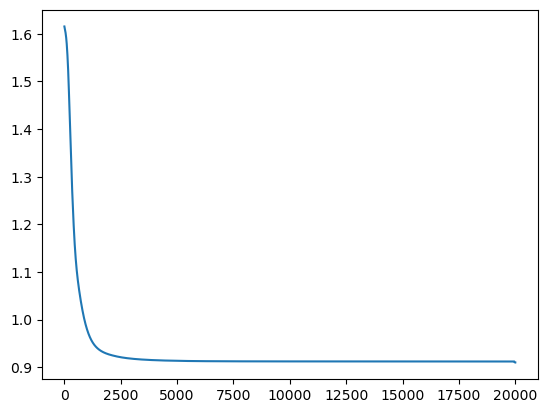

In [108]:
train_model(model1, criterion, optimizer,train_loader,20000)

In [109]:
np.shape(datapartIIrf)

(400, 15)

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clffr=RandomForestClassifier(n_estimators=10000,max_depth=2000,min_samples_leaf=10,max_leaf_nodes=5000)
# pipeline = make_pipeline(StandardScaler(), Ridge(alpha=0.1), RandomForestClassifier())
clffr.fit(datapartIIrf,yvaluerf)
sss13=clffr.predict(datapartIIIrf)
# predictsvm=classifier1.predict(featuresffs_svmtest)
# sss3=classifier1.predict(featuresffs_svmtesty)
# a1=confusion_matrix(predictsvm,ylabeltest)
a52=clffr.score(datapartIIrf, yvaluerf)
a32=clffr.score(datapartIIIrf, test_yrf)
# a12=clffr.score(xtest_selectedrf, y_test)
a22=confusion_matrix(sss13,y_test)

In [163]:
print(a52,a32,a22)

0.9875 0.9629629629629629 [[74  1  0  0  5]
 [ 1 80  0  0  0]
 [ 0  0 81  2  0]
 [ 0  0  0 79  0]
 [ 6  0  0  0 76]]


In [129]:
conf_mat=a22
total_samples = np.sum(conf_mat)

# Calculate accuracy for each class
accuracy = np.diag(conf_mat) / np.sum(conf_mat, axis=1)

# Calculate specificity for each class
false_positive = np.sum(conf_mat, axis=0) - np.diag(conf_mat)
true_negative = total_samples - np.sum(conf_mat, axis=1) - false_positive
specificity = true_negative / (true_negative + false_positive)

# Calculate sensitivity for each class
sensitivity = np.diag(conf_mat) / np.sum(conf_mat, axis=0)

# Print the results
for i in range(5):
    print(f"Class {i}: accuracy = {accuracy[i]:.3f}, specificity = {specificity[i]:.3f}, sensitivity = {sensitivity[i]:.3f}")

Class 0: accuracy = 0.924, specificity = 0.975, sensitivity = 0.901
Class 1: accuracy = 0.988, specificity = 0.997, sensitivity = 0.988
Class 2: accuracy = 0.988, specificity = 1.000, sensitivity = 1.000
Class 3: accuracy = 0.988, specificity = 0.997, sensitivity = 0.988
Class 4: accuracy = 0.927, specificity = 0.985, sensitivity = 0.938


In [130]:
torch.sum(1*(torch.argmax(model1(datapartIII.float()),axis=-1)==test_y.long()))/405
 

C:\Users\PikPik\anaconda\anaconda latest\lib\site-packages\torch\nn\modules\container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor(0.9630)

In [166]:
np.shape(datapartIII)

torch.Size([405, 20])

In [163]:
torch.sum(1*(torch.argmax(model1(datapartII.float()),axis=-1)==yvalue.long()))/1005

tensor(0.9274)

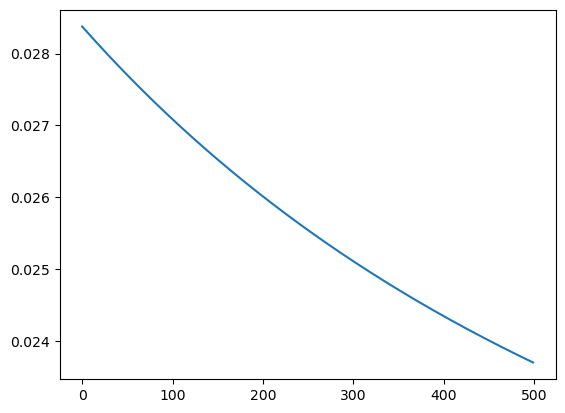

In [104]:
train_model(model1, criterion, optimizer,train_loader,5000)

In [ ]:
faultI10=scipy.io.loadmat('C:/Users/PikPik/Desktop/Rotating Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_1_10hz.mat')
faultI30=scipy.io.loadmat('C:/Users/PikPik/Desktop/Rotating Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_1_30hz.mat')
faultII10=scipy.io.loadmat('C:/Users/PikPik/Desktop/Rotating Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_2_10hz.mat')
faultII30=scipy.io.loadmat('C:/Users/PikPik/Desktop/Rotating Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_2_30hz.mat')
faultIII10=scipy.io.loadmat('C:/Users/PikPik/Desktop/Rotating Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_3_10hz.mat')
faultIII30=scipy.io.loadmat('C:/Users/PikPik/Desktop/Rotating Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_3_30hz.mat')
faultIV10=scipy.io.loadmat('C:/Users/PikPik/Desktop/Rotating Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_4_10hz.mat')
faultIV30=scipy.io.loadmat('C:/Users/PikPik/Desktop/Rotating Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_4_30hz.mat')
faultV10=scipy.io.loadmat('C:/Users/PikPik/Desktop/Rotating Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_5_10hz.mat')
faultV30=scipy.io.loadmat('C:/Users/PikPik/Desktop/Rotating Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_5_30hz.mat')
# faultVI10=scipy.io.loadmat('C:/Users/PikPik/Desktop/Rotating Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_6_10hz.mat')
# faultVI30=scipy.io.loadmat('C:/Users/PikPik/Desktop/Rotating Machine/unbalanced fault/without alphabet/Unbalanced.mat/Acquisition_un_6_30hz.mat')

In [ ]:
sigII30=faultII30['Acquisition_un_2_30hz']
sigII10=faultII10['Acquisition_un_2_10hz']
del faultII30,faultII10
sigI30=faultI30['Acquisition_un_1_30hz']
sigI10=faultI10['Acquisition_un_1_10hz']
del faultI30,faultI10
sigIII10=faultIII10['Acquisition_un_3_10hz']
sigIII30=faultIII30['Acquisition_un_3_30hz']
del faultIII10,faultIII30
sigIV10=faultIV10['Acquisition_un_4_10hz']
sigIV30=faultIV30['Acquisition_un_4_30hz']
del faultIV10,faultIV30
sigV10=faultV10['Acquisition_un_5_10hz']
sigV30=faultV30['Acquisition_un_5_30hz']
del faultV10,faultV30
# sigVI10=faultVI10['Acquisition_un_6_10hz']
# sigVI30=faultVI30['Acquisition_un_6_30hz']
# del faultVI10,faultVI30

In [ ]:

def sliding_window(data, window_size, stride, training_size):
    """
    Applies a sliding window to the given data with the specified window size
    and stride length. Padding is added at the beginning and end of the data to
    ensure all samples are included in windows.
    """
    num_padding = window_size - stride
    data_padded = np.pad(data, ((num_padding, num_padding), (0, 0)), 'constant')
    window_data = []
    for i in range(0, len(data_padded) - window_size + 1, stride):
        window = data_padded[i:i+window_size, :]
        window_data.append(window)
    window_data = np.array(window_data)
    window_data = window_data[:training_size, :, :]
    window_data = np.transpose(window_data, (0, 2, 1))
    return window_data

In [ ]:
windowsize=800
stride=600

In [ ]:
sigtI10hz=sliding_window(sigI10,windowsize,stride,40000)[:,1:13,:]
sigtI30hz=sliding_window(sigI30,windowsize,stride,40000)[:,1:13,:]
sigtII10hz=sliding_window(sigII10,windowsize,stride,40000)[:,1:13,:]
sigtII30hz=sliding_window(sigII30,windowsize,stride,40000)[:,1:13,:]
del sigI10,sigI30,sigII10,sigII30
sigtIII30hz=sliding_window(sigIII30,windowsize,stride,40000)[:,1:13,:]
sigtIII10hz=sliding_window(sigIII10,windowsize,stride,40000)[:,1:13,:]
sigtIV30hz=sliding_window(sigIV30,windowsize,stride,40000)[:,1:13,:]
sigtIV10hz=sliding_window(sigIV10,windowsize,stride,40000)[:,1:13,:]
del sigIII30,sigIII10,sigIV30,sigIV10
sigtV30hz=sliding_window(sigV30,windowsize,stride,40000)[:,1:13,:]
sigtV10hz=sliding_window(sigV10,windowsize,stride,40000)[:,1:13,:]
# sigtVI30hz=sliding_window(sigVI30,windowsize,stride,40000)
# sigtVI10hz=sliding_window(sigVI10,windowsize,stride,40000)
# del sigV30,sigV10,sigVI30,sigVI10

In [ ]:
from scipy import signal
from scipy.signal import butter, filtfilt

In [ ]:
np.shape(sigtI10hz)

In [ ]:
def normalize_last_dim(data, epsilon=0.01):
    # compute mean and standard deviation along the last dimension of the data
    last_dim_mean = np.mean(data, axis=-1, keepdims=True)
    last_dim_std = np.std(data, axis=-1, keepdims=True)

    # normalize the last dimension using the mean and standard deviation
    normalized_data = (data- last_dim_mean) /last_dim_std+epsilon

#     # stack the normalized values with the original values along the last dimension
    # normalized_data = np.concatenate([data[..., :-1], normalized_data[..., np.newaxis]], axis=-1)

    return normalized_data

In [ ]:
a1n=normalize_last_dim(sigtI10hz)
del sigtI10hz
a2n=normalize_last_dim(sigtI30hz)
del sigtI30hz
a3n=normalize_last_dim(sigtII10hz)
del sigtII10hz
a4n=normalize_last_dim(sigtII30hz)
del sigtII30hz
a5n=normalize_last_dim(sigtIII10hz)
del sigtIII10hz
a6n=normalize_last_dim(sigtIII30hz)
del sigtIII30hz
a7n=normalize_last_dim(sigtIV10hz)
del sigtIV10hz
a8n=normalize_last_dim(sigtIV30hz)
del sigtIV30hz
a9n=normalize_last_dim(sigtV10hz)
del sigtV10hz
a10n=normalize_last_dim(sigtV30hz)
del sigtV30hz

In [ ]:
datalable1=np.concatenate([a1n,a2n],axis=-1)
del a1n,a2n
datalable2=np.concatenate([a3n,a4n],axis=-1)
del a3n,a4n
datalable3=np.concatenate([a5n,a6n],axis=-1)
del a5n,a6n
datalable4=np.concatenate([a7n,a8n],axis=-1)
del a7n,a8n
datalabele5=np.concatenate([a9n,a10n],axis=-1)
del a9n,a10n

In [ ]:
labels=np.concatenate((np.ones(np.shape(datalable1)[0]),np.zeros(np.shape(datalable1)[0]),np.ones(np.shape(datalable1)[0])*4,np.ones(np.shape(datalable1)[0])*2,np.ones(np.shape(datalable1)[0])*3),axis=0)
dataall=np.concatenate([datalable1,datalable2,datalable3,datalable4,datalabele5],axis=0)

In [ ]:
indices = np.random.permutation(dataall.shape[0])

# Use the shuffled indices to shuffle both data and labels
shuffled_data = dataall[indices]
shuffled_labels = labels[indices]

In [83]:
import numpy as np
from sklearn.model_selection import train_test_split

def split_data_equally(X, y, test_size=0.4, random_state=None):
    # Get unique labels in y and their indices
    labels, indices = np.unique(y, return_index=True)
    n_labels = len(labels)
    
    # Split each label's indices into test and train
    train_indices = []
    test_indices = []
    for i in range(n_labels):
        label_indices = np.where(y == labels[i])[0]
        label_train_indices, label_test_indices = train_test_split(label_indices, test_size=test_size, 
                                                                    random_state=random_state)
        train_indices += list(label_train_indices)
        test_indices += list(label_test_indices)
    
    # Shuffle train and test indices
    np.random.shuffle(train_indices)
    np.random.shuffle(test_indices)
    
    # Get corresponding data and labels
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = split_data_equally(shuffled_data,shuffled_labels,test_size=0.3 )

In [71]:
np.shape(X_train1cnn)

(4515, 12, 1000)

In [93]:
import tensorflow as tf
import keras
# Define the model
model = tf.keras.Sequential([
    # Convolutional layer with 32 filters, each 3x3 in size
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=( 12,4000)),
    # Max pooling layer with pool size of 2
    tf.keras.layers.MaxPooling1D(pool_size=2),
    # Flatten the output of the convolutional layer
    tf.keras.layers.Flatten(),
    # Dense layer with 64 units
    tf.keras.layers.Dense(units=64, activation='relu'),
    # Output layer with 5 units (one for each label)
    tf.keras.layers.Dense(units=5, activation='softmax')
])

# # Compile the model
# optimizer = keras.optimizers.Adam(lr=0.0005)
# model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [62]:
import tensorflow as tf
import keras

# Define the model
model = tf.keras.Sequential([
    # Convolutional layer with 32 filters, each 3x3 in size
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(12, 4000)),
    # Max pooling layer with pool size of 2
    tf.keras.layers.MaxPooling1D(pool_size=2),
    # Flatten the output of the convolutional layer
    tf.keras.layers.Flatten(),
    # Dense layer with 32 units
    tf.keras.layers.Dense(units=32, activation='relu'),
    # Output layer with 5 units (one for each label)
    tf.keras.layers.Dense(units=5, activation='softmax')
])

In [74]:
import tensorflow as tf
import keras

# Define the model
model = tf.keras.Sequential([
    # Convolutional layer with 32 filters, each 3x3 in size
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(12, 1600)),
    # Max pooling layer with pool size of 2
    tf.keras.layers.MaxPooling1D(pool_size=2),
    # Flatten the output of the convolutional layer
    tf.keras.layers.Flatten(),
    # Dense layer with 32 units
    tf.keras.layers.Dense(units=32, activation='relu'),
    # Dropout layer with 0.2 probability
    tf.keras.layers.Dropout(0.7),
    # Output layer with 5 units (one for each label)
    tf.keras.layers.Dense(units=5, activation='softmax')
])

In [75]:
from keras.callbacks import LearningRateScheduler

# Define a function to decay the learning rate
def lr_decay(epoch):
    initial_lr = 0.001
    decay_rate = 0.1
    decay_step = 10
    lr = initial_lr * (decay_rate ** (epoch // decay_step))
    return lr

# Create an instance of the LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_decay, verbose=1)

# Create an optimizer and add the learning rate scheduler callback
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train1cnn, y_traincnn, epochs=50,  batch_size=200,validation_split=0.2, callbacks=[lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/50
13/13 [==============================] - 1s 63ms/step - loss: 2.4231 - accuracy: 0.2126 - val_loss: 1.6805 - val_accuracy: 0.2060 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/50
13/13 [==============================] - 1s 41ms/step - loss: 1.6321 - accuracy: 0.2587 - val_loss: 1.6273 - val_accuracy: 0.2076 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/50
13/13 [==============================] - 1s 46ms/step - loss: 1.5430 - accuracy: 0.2766 - val_loss: 1.6255 - val_accuracy: 0.2126 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/50
13/13 [==============================] - 1s 39ms/step - loss: 1.5276 - accuracy: 0.2724 - val_loss: 1.6202 - val_accuracy: 0.1960 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/50
13/13 [==============================] - 1s 40ms/step

In [87]:
np.shape(X_train1cnn)

(950, 12, 4000)